In [1]:
%matplotlib inline


# Arranging multiple Axes in a Figure

Often more than one Axes is wanted on a figure at a time, usually
organized into a regular grid.  Matplotlib has a variety of tools for
working with grids of Axes that have evolved over the history of the library.
Here we will discuss the tools we think users should use most often, the tools
that underpin how Axes are organized, and mention some of the older tools.

<div class="alert alert-info"><h4>Note</h4><p>Matplotlib uses *Axes* to refer to the drawing area that contains
    data, x- and y-axis, ticks, labels, title, etc. See `figure_parts`
    for more details.  Another term that is often used is "subplot", which
    refers to an Axes that is in a grid with other Axes objects.</p></div>

## Overview

### Create grid-shaped combinations of Axes

`~matplotlib.pyplot.subplots`
    The primary function used to create figures and a grid of Axes.  It
    creates and places all Axes on the figure at once, and returns an
    object array with handles for the Axes in the grid.  See
    `.Figure.subplots`.

or

`~matplotlib.pyplot.subplot_mosaic`
    A simple way to create figures and a grid of Axes, with the added
    flexibility that Axes can also span rows or columns. The Axes
    are returned in a labelled dictionary instead of an array.  See also
    `.Figure.subplot_mosaic` and :doc:`/tutorials/provisional/mosaic`.

Sometimes it is natural to have more than one distinct group of Axes grids,
in which case Matplotlib has the concept of `~.figure.SubFigure`:

`~matplotlib.figure.SubFigure`
    A virtual figure within a figure.

### Underlying tools

Underlying these are the concept of a `~.gridspec.GridSpec` and
a `~.SubplotSpec`:

`~matplotlib.gridspec.GridSpec`
    Specifies the geometry of the grid that a subplot will be
    placed. The number of rows and number of columns of the grid
    need to be set. Optionally, the subplot layout parameters
    (e.g., left, right, etc.) can be tuned.

`~matplotlib.gridspec.SubplotSpec`
    Specifies the location of the subplot in the given `.GridSpec`.

### Adding single Axes at a time

The above functions create all Axes in a single function call.  It is also
possible to add Axes one at a time, and this was originally how Matplotlib
used to work.  Doing so is generally less elegant and flexible, though
sometimes useful for interactive work or to place an Axes in a custom
location:

`~matplotlib.figure.Figure.add_axes`
    Adds a single axes at a location specified by
    ``[left, bottom, width, height]`` in fractions of figure width or height.

`~matplotlib.pyplot.subplot` or `.Figure.add_subplot`
    Adds a single subplot on a figure, with 1-based indexing (inherited from
    Matlab).  Columns and rows can be spanned by specifying a range of grid
    cells.

`~matplotlib.pyplot.subplot2grid`
    Similar to `.pyplot.subplot`, but uses 0-based indexing and two-d python
    slicing to choose cells.

.. redirect-from:: /tutorials/intermediate/gridspec


## High-level methods for making grids

### Basic 2x2 grid

We can create a basic 2-by-2 grid of Axes using
`~matplotlib.pyplot.subplots`.  It returns a `~matplotlib.figure.Figure`
instance and an array of `~matplotlib.axes.Axes` objects.  The Axes
objects can be used to access methods to place artists on the Axes; here
we use `~.Axes.annotate`, but other examples could be `~.Axes.plot`,
`~.Axes.pcolormesh`, etc.



Text(0.5, 0.98, 'plt.subplots()')

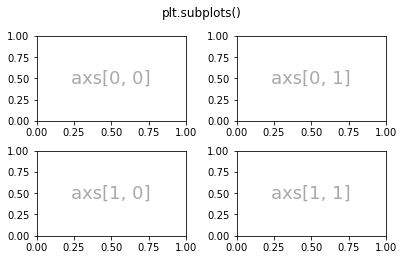

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        constrained_layout=True)
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                               transform=axs[row, col].transAxes,
                               ha='center', va='center', fontsize=18,
                               color='darkgrey')
fig.suptitle('plt.subplots()')

We will annotate a lot of Axes, so lets encapsulate the annotation, rather
than having that large piece of annotation code every time we need it:



In [3]:
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

The same effect can be achieved with `~.pyplot.subplot_mosaic`,
but the return type is a dictionary instead of an array, where the user
can give the keys useful meanings.  Here we provide two lists, each list
representing a row, and each element in the list a key representing the
column.



Text(0.5, 0.98, 'plt.subplot_mosaic()')

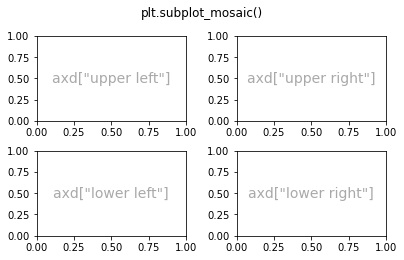

In [4]:
fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower left', 'lower right']],
                              figsize=(5.5, 3.5), constrained_layout=True)
for k in axd:
    annotate_axes(axd[k], f'axd["{k}"]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

### Axes spanning rows or columns in a grid

Sometimes we want Axes to span rows or columns of the grid.
There are actually multiple ways to accomplish this, but the most
convenient is probably to use `~.pyplot.subplot_mosaic` by repeating one
of the keys:



Text(0.5, 0.98, 'plt.subplot_mosaic()')

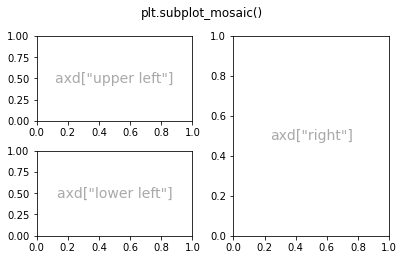

In [5]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(5.5, 3.5), constrained_layout=True)
for k in axd:
    annotate_axes(axd[k], f'axd["{k}"]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

See below for the description of how to do the same thing using
`~matplotlib.gridspec.GridSpec` or `~matplotlib.pyplot.subplot2grid`.

### Variable widths or heights in a grid

Both `~.pyplot.subplots` and `~.pyplot.subplot_mosaic` allow the rows
in the grid to be different heights, and the columns to be different
widths using the *gridspec_kw* keyword argument.
Spacing parameters accepted by `~matplotlib.gridspec.GridSpec`
can be passed to `~matplotlib.pyplot.subplots` and
`~matplotlib.pyplot.subplot_mosaic`:



Text(0.5, 0.98, 'plt.subplot_mosaic()')

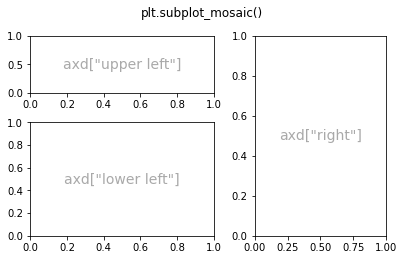

In [6]:
gs_kw = dict(width_ratios=[1.4, 1], height_ratios=[1, 2])
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              gridspec_kw=gs_kw, figsize=(5.5, 3.5),
                              constrained_layout=True)
for k in axd:
    annotate_axes(axd[k], f'axd["{k}"]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

### Nested Axes layouts

Sometimes it is helpful to have two or more grids of Axes that
may not need to be related to one another.  The most simple way to
accomplish this is to use `.Figure.subfigures`.  Note that the subfigure
layouts are independent, so the Axes spines in each subfigure are not
necessarily aligned.  See below for a more verbose way to achieve the same
effect with `~.gridspec.GridSpecFromSubplotSpec`.



In [7]:
fig = plt.figure(constrained_layout=True)
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(2, 2)
subfigs[0].set_facecolor('0.9')
subfigs[0].suptitle('subfigs[0]\nLeft side')
subfigs[0].supxlabel('xlabel for subfigs[0]')

axs1 = subfigs[1].subplots(3, 1)
subfigs[1].suptitle('subfigs[1]')
subfigs[1].supylabel('ylabel for subfigs[1]')

AttributeError: 'Figure' object has no attribute 'subfigures'

<Figure size 432x288 with 0 Axes>

It is also possible to nest Axes using `~.pyplot.subplot_mosaic` using
nested lists.  This method does not use subfigures, like above, so lacks
the ability to add per-subfigure ``suptitle`` and ``supxlabel``, etc.
Rather it is a convenience wrapper around the `~.SubplotSpec.subgridspec`
method described below.



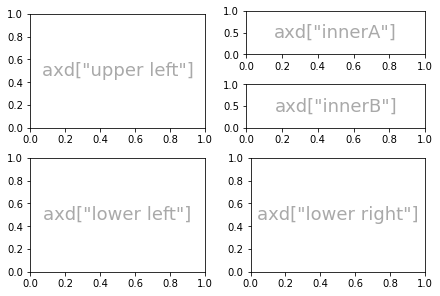

In [8]:
inner = [['innerA'],
         ['innerB']]
outer = [['upper left',  inner],
          ['lower left', 'lower right']]

fig, axd = plt.subplot_mosaic(outer, constrained_layout=True)
for k in axd:
    annotate_axes(axd[k], f'axd["{k}"]')

## Low-level and advanced grid methods

Internally, the arrangement of a grid of Axes is controlled by creating
instances of `~.GridSpec` and `~.SubplotSpec`. *GridSpec* defines a
(possibly non-uniform) grid of cells. Indexing into the *GridSpec* returns
a SubplotSpec that covers one or more grid cells, and can be used to
specify the location of an Axes.

The following examples show how to use low-level methods to arrange Axes
using *GridSpec* objects.

### Basic 2x2 grid

We can accopmplish a 2x2 grid in the same manner as
``plt.subplots(2, 2)``:



Text(0.5, 0.98, 'Manually added subplots using add_gridspec')

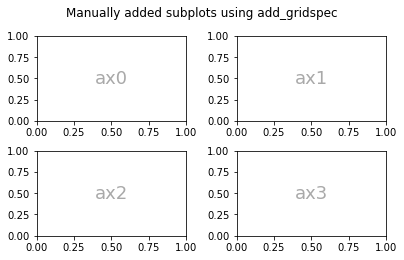

In [9]:
fig = plt.figure(figsize=(5.5, 3.5), constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=2)

ax0 = fig.add_subplot(spec[0, 0])
annotate_axes(ax0, 'ax0')

ax1 = fig.add_subplot(spec[0, 1])
annotate_axes(ax1, 'ax1')

ax2 = fig.add_subplot(spec[1, 0])
annotate_axes(ax2, 'ax2')

ax3 = fig.add_subplot(spec[1, 1])
annotate_axes(ax3, 'ax3')

fig.suptitle('Manually added subplots using add_gridspec')

### Axes spanning rows or grids in a grid

We can index the *spec* array using [NumPy slice syntax](https://numpy.org/doc/stable/reference/arrays.indexing.html)
and the new Axes will span the slice.  This would be the same
as ``fig, axd = plt.subplot_mosaic([['ax0', 'ax0'], ['ax1', 'ax2']], ...)``:



Text(0.5, 0.98, 'Manually added subplots, spanning a column')

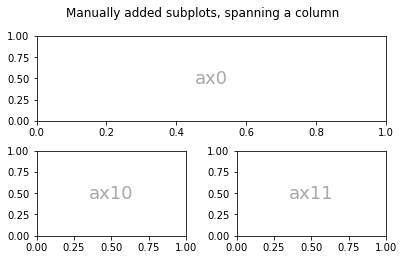

In [10]:
fig = plt.figure(figsize=(5.5, 3.5), constrained_layout=True)
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, :])
annotate_axes(ax0, 'ax0')

ax10 = fig.add_subplot(spec[1, 0])
annotate_axes(ax10, 'ax10')

ax11 = fig.add_subplot(spec[1, 1])
annotate_axes(ax11, 'ax11')

fig.suptitle('Manually added subplots, spanning a column')

### Manual adjustments to a *GridSpec* layout

When a  *GridSpec* is explicitly used, you can adjust the layout
parameters of subplots that are created from the  *GridSpec*.  Note this
option is not compatible with ``constrained_layout`` or
`.Figure.tight_layout` which both ignore *left* and *right* and adjust
subplot sizes to fill the figure.  Usually such manual placement
requires iterations to make the Axes tick labels not overlap the Axes.

These spacing parameters can also be passed to `~.pyplot.subplots` and
`~.pyplot.subplot_mosaic` as the *gridspec_kw* argument.



Text(0.5, 0.98, 'Manual gridspec with right=0.75')

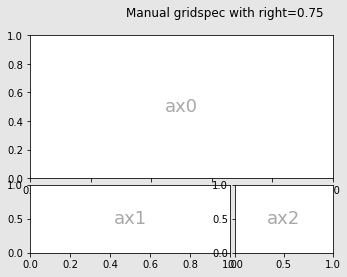

In [11]:
fig = plt.figure(constrained_layout=False, facecolor='0.9')
gs = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.75,
                      hspace=0.1, wspace=0.05)
ax0 = fig.add_subplot(gs[:-1, :])
annotate_axes(ax0, 'ax0')
ax1 = fig.add_subplot(gs[-1, :-1])
annotate_axes(ax1, 'ax1')
ax2 = fig.add_subplot(gs[-1, -1])
annotate_axes(ax2, 'ax2')
fig.suptitle('Manual gridspec with right=0.75')

### Nested layouts with SubplotSpec

You can create nested layout similar to `~.Figure.subfigures` using
`~.gridspec.SubplotSpec.subgridspec`.  Here the Axes spines *are*
aligned.

Note this is also available from the more verbose
`.gridspec.GridSpecFromSubplotSpec`.



Text(0.5, 0.98, 'nested gridspecs')

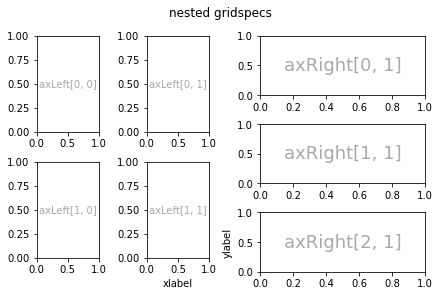

In [12]:
fig = plt.figure(constrained_layout=True)
gs0 = fig.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 2)
gs01 = gs0[1].subgridspec(3, 1)

for a in range(2):
    for b in range(2):
        ax = fig.add_subplot(gs00[a, b])
        annotate_axes(ax, f'axLeft[{a}, {b}]', fontsize=10)
        if a == 1 and b == 1:
            ax.set_xlabel('xlabel')
for a in range(3):
    ax = fig.add_subplot(gs01[a])
    annotate_axes(ax, f'axRight[{a}, {b}]')
    if a == 2:
        ax.set_ylabel('ylabel')

fig.suptitle('nested gridspecs')

Here's a more sophisticated example of nested *GridSpec*: We create an outer
4x4 grid with each cell containing an inner 3x3 grid of Axes. We outline
the outer 4x4 grid by hiding appropriate spines in each of the inner 3x3
grids.



AttributeError: 'collections.OrderedDict' object has no attribute 'top'

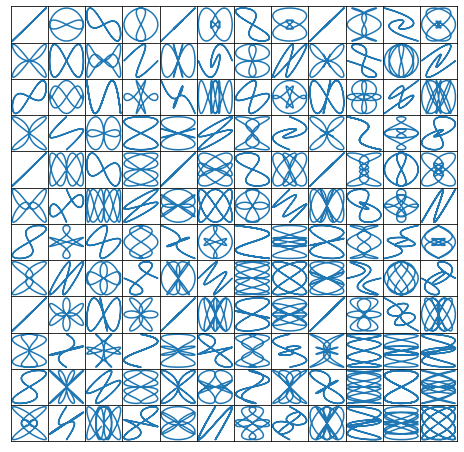

In [13]:
def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

fig = plt.figure(figsize=(8, 8), constrained_layout=False)
outer_grid = fig.add_gridspec(4, 4, wspace=0, hspace=0)

for a in range(4):
    for b in range(4):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 3, wspace=0, hspace=0)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for (c, d), ax in np.ndenumerate(axs):
            ax.plot(*squiggle_xy(a + 1, b + 1, c + 1, d + 1))
            ax.set(xticks=[], yticks=[])

# show only the outside spines
for ax in fig.get_axes():
    ss = ax.get_subplotspec()
    ax.spines.top.set_visible(ss.is_first_row())
    ax.spines.bottom.set_visible(ss.is_last_row())
    ax.spines.left.set_visible(ss.is_first_col())
    ax.spines.right.set_visible(ss.is_last_col())

plt.show()

## More reading

 - More details about :doc:`subplot mosaic </tutorials/provisional/mosaic>`.
 - More details about :doc:`constrained layout
   </tutorials/intermediate/constrainedlayout_guide>`, used to align
   spacing in most of these examples.

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.pyplot.subplots`
   - `matplotlib.pyplot.subplot_mosaic`
   - `matplotlib.figure.Figure.add_gridspec`
   - `matplotlib.figure.Figure.add_subplot`
   - `matplotlib.gridspec.GridSpec`
   - `matplotlib.gridspec.SubplotSpec.subgridspec`
   - `matplotlib.gridspec.GridSpecFromSubplotSpec`

